In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Juan/BaseAgro.xlsx")
df.head()

,N° Area,Departamento,Ar-Ur,Ar-Ru-Ag,Ar-Ru-Di,TOTAL-Ar,Viv-Casa,Viv-Rancho,Viv-Casilla,Viv-Depto,Viv-Pieza,Viv-Pieza2,Viv-Local,Viv-Movil,Viv-Calle,TOTAL-Viv,CasaT-A,CasaT-B,TOTAL-CasaT,VIVIENDAS,PobUrbana,PobRural,TOTAL-Pob,Esc5-9,Esc10-14,Esc15-19,TOTAL-Esc,Pob_<29,Pob_>65,TOTAL-Pob.1,Educ1,Educ2,Educ3,Educ4,Educ5,Educ6,Educ7,Educ8,Educ9,TOTAL-Educ,...,Sin Luz,TOTAL-Luz,"H0,50","H0,51-0,99","H1-1,49","H1,50-1,99",H2-3,HMas3,TOTAL-H.1,ProcA1,ProcA2,ProcA3,ProcA4,ProcA5,ProcA6,TOTAL-Proc,CalSS1,CalSS2,CalSS3,TOTAL-Cal,BanoSI,BanoNO,TOTAL-Bano,ExclusivoSI,ExclusivoNO,TOTAL-Exclusivo,CadenaSI,CadenaNO,TOTAL-Cadena,Desag1,Desag2,Desag3,Desag4,TOTAL-Desag,Piso1,Piso2,Piso3,Piso4,TOTAL-Piso,HOGARES
0,7,Apóstoles,9220,413,1437,11070,9318,178,1236,214,93,8,9,1,2,11059,6856,2462,9318,11057,35213,7036,42249,4713,5143,4614,14470,25172,2902,42249,1607,7044,13569,3754,7026,1614,914,658,916,37102,...,578,11556,2585,1947,3401,1244,1853,526,11556,9232,870,64,1203,5,182,11556,536,5446,5574,11556,10952,604,11556,10522,430,10952,8351,2601,10952,561,5971,2846,1574,10952,6192,4361,828,175,11556,11556
1,14,Cainguás,7914,421,5689,14024,13233,355,150,77,147,1,32,3,2,14000,6508,6725,13233,13998,28969,24434,53403,6240,6748,5993,18981,32999,3421,53403,1854,9463,21980,2438,7155,1224,538,478,557,45687,...,1029,14387,2660,2388,4565,1745,2401,628,14387,7936,1332,156,3537,29,1397,14387,93,3869,10425,14387,13352,1035,14387,12784,568,13352,7533,5819,13352,101,4748,3968,4535,13352,10000,3871,290,226,14387,14387
2,21,Candelaria,4802,987,1130,6919,6435,155,264,3,29,0,12,5,1,6904,4127,2308,6435,6903,18762,8278,27040,3062,3251,3033,9346,16091,1721,27040,949,4360,9322,2363,4594,534,324,292,465,23203,...,388,7299,1341,1013,2234,870,1406,435,7299,5479,459,27,1176,12,146,7299,200,3303,3796,7299,6807,492,7299,6556,251,6807,4890,1917,6807,210,3775,1548,1274,6807,3293,3255,566,185,7299,7299
3,28,Capital,86931,319,1088,88338,71286,1440,2699,11442,1042,29,250,5,29,88222,59311,11610,70921,88193,319469,5287,324756,30542,33182,34016,97740,52429,4899,87853,11916,39445,75740,44007,65032,10635,9111,14397,20638,290921,...,499,92882,18968,16146,28444,10543,14876,3905,92882,85842,3982,279,2472,175,132,92882,40391,29811,22680,92882,89962,2920,92882,86420,3542,89962,80385,9577,89962,40654,32780,13564,2964,89962,65860,24242,1668,1112,92882,92939
4,35,Concepción,1684,134,742,2560,2206,218,107,0,6,0,3,12,0,2552,1395,811,2206,2552,6332,3245,9577,1165,1188,1068,3421,5769,713,9577,290,1889,3626,496,1278,301,118,66,104,8168,...,348,2584,584,417,746,295,415,127,2584,1759,358,8,309,4,146,2584,0,898,1686,2584,2386,198,2584,2290,96,2386,1609,777,2386,0,1060,769,557,2386,1075,1094,370,45,2584,2584


In [17]:
df2 = pd.read_excel("/content/drive/MyDrive/Juan/BaseAgroProp.xlsx")
df2

,Departamento,Ar-Ur,Ar-Ru-Ag,Ar-Ru-Di,Viv-Casa,Viv-Rancho,Viv-Casilla,Viv-Depto,Viv-Pieza,Viv-Pieza2,Viv-Local,Viv-Movil,Viv-Calle,CasaT-A,CasaT-B,PobUrbana,PobRural,Pob_<29,Pob_>65,Educ1,Educ2,Educ3,Educ4,Educ5,Educ6,Educ7,Educ8,Educ9,Cat-Obrero,Cat-Patron,Cat-Cuentaprop,Cat-Familiar,Cond-Ocup,Cond-Desoc,Cond-Inact,Sec-Nac,Sec-Prov,Sec-Mun,Sec-Priv,Carac1,...,2-P,3-P,4-P,5-P,6-P,7-P,8mas-P,Luz-Red,Luz-Motor,Luz-Otro,Sin Luz,"H0,50","H0,51-0,99","H1-1,49","H1,50-1,99",H2-3,HMas3,ProcA1,ProcA2,ProcA3,ProcA4,ProcA5,ProcA6,CalSS1,CalSS2,CalSS3,BanoSI,BanoNO,ExclusivoSI,ExclusivoNO,CadenaSI,CadenaNO,Desag1,Desag2,Desag3,Desag4,Piso1,Piso2,Piso3,Piso4
0,Apóstoles,0.832882,0.037308,0.129810,0.842572,0.016095,0.111764,0.019351,0.008409,0.000723,0.000814,0.000090,0.000181,0.735780,0.264220,0.833464,0.166536,0.595801,0.068688,0.043313,0.189855,0.365722,0.101181,0.189370,0.043502,0.024635,0.017735,0.024689,0.440790,0.010408,0.384282,0.164521,0.518471,0.028917,0.452612,0.061299,0.187074,0.052217,0.699410,0.159250,...,0.191762,0.184579,0.176964,0.116563,0.086016,0.035479,0.054690,0.945137,0.002163,0.002683,0.050017,0.223693,0.168484,0.294306,0.107650,0.160350,0.045517,0.798892,0.075286,0.005538,0.104102,0.000433,0.015749,0.046383,0.471270,0.482347,0.947733,0.052267,0.960738,0.039262,0.762509,0.237491,0.051224,0.545197,0.259861,0.143718,0.535826,0.377380,0.071651,0.015144
1,Cainguás,0.564318,0.030020,0.405662,0.945214,0.025357,0.010714,0.005500,0.010500,0.000071,0.002286,0.000214,0.000143,0.491801,0.508199,0.690069,0.309931,0.617924,0.064060,0.040580,0.207127,0.481100,0.053363,0.156609,0.026791,0.011776,0.010462,0.012192,0.473771,0.014171,0.271050,0.241008,0.543646,0.020366,0.435987,0.021536,0.174570,0.060039,0.743855,0.381892,...,0.184820,0.196775,0.180163,0.119274,0.083131,0.037812,0.057274,0.923542,0.001182,0.003753,0.071523,0.184889,0.165983,0.317300,0.121290,0.166887,0.043651,0.551609,0.092584,0.010843,0.245847,0.002016,0.097102,0.006464,0.268923,0.724612,0.928060,0.071940,0.957460,0.042540,0.564185,0.435815,0.007564,0.355602,0.297184,0.339649,0.695072,0.269062,0.020157,0.015709
2,Candelaria,0.694031,0.142651,0.163318,0.932068,0.022451,0.038239,0.000435,0.004200,0.000000,0.001738,0.000724,0.000145,0.641336,0.358664,0.765615,0.234385,0.595081,0.063646,0.040900,0.187907,0.401758,0.101840,0.197992,0.023014,0.013964,0.012585,0.020041,0.616155,0.015131,0.244937,0.123777,0.485340,0.028767,0.485893,0.058715,0.261632,0.069609,0.610044,0.229920,...,0.184683,0.178381,0.165228,0.121112,0.083984,0.040554,0.055487,0.940129,0.001233,0.005480,0.053158,0.183724,0.138786,0.306069,0.119194,0.192629,0.059597,0.750651,0.062885,0.003699,0.161118,0.001644,0.020003,0.027401,0.452528,0.520071,0.932594,0.067406,0.963126,0.036874,0.718378,0.281622,0.030851,0.554576,0.227413,0.187160,0.451158,0.445952,0.077545,0.025346
3,Capital,0.984073,0.003611,0.012316,0.808030,0.016322,0.030593,0.129696,0.011811,0.000329,0.002834,0.000057,0.000329,0.836297,0.163703,0.983981,0.016019,0.596781,0.055764,0.040960,0.135587,0.260346,0.151268,0.223538,0.036556,0.031318,0.049488,0.070940,0.678971,0.056419,0.218993,0.045617,0.578026,0.039368,0.382606,0.070456,0.261298,0.048784,0.619462,0.061219,...,0.204561,0.200211,0.182522,0.120422,0.069217,0.030383,0.037575,0.986919,0.001206,0.006503,0.005372,0.204216,0.173833,0.306238,0.113510,0.160160,0.042043,0.924205,0.042872,0.003004,0.026614,0.001884,0.001421,0.434864,0.320956,0.244181,0.968562,0.031438,0.960628,0.039372,0.893544,0.106456,0.451902,0.364376,0.150775,0.032947,0.709072,0.260998,0.017958,0.011972
4,Concepción,0.657813,0.052344,0.289844,0.864420,0.085423,0.041928,0.000000,0.002351,0.000000,0.001176,0.004702,0.000000,0.632366,0.367634,0.746919,0.253081,0.602381,0.074449,0.035504,0.231268,0.443928,0.060725,0.156464,0.036851,0.014447,0.008080,0.012733,0.674022,0.019392,0.206286,0.100301,0.466469,0.021210,0.512321,0.082837,0.207837,0.052579,0.656746,0.271147,...,0.169892,0.174149,0.162539,0.128483,0.077012,0.046053,0.063080,0.861842

In [18]:
regiones = pd.read_excel("/content/drive/MyDrive/Juan/MUNIS_Regiones.xlsx", sheet_name='Copia1')

In [50]:
edad_escolar = pd.read_excel("/content/drive/MyDrive/Ministerio del Agro/Bases/edad-escolar.xlsx")
edad_escolar['Cat0 %'] = edad_escolar['Cat0']/edad_escolar['TotalCat']
edad_escolar['Cat1 %'] = edad_escolar['Cat1']/edad_escolar['TotalCat']
edad_escolar['Cat2 %'] = edad_escolar['Cat2']/edad_escolar['TotalCat']
edad_escolar['Cat3 %'] = edad_escolar['Cat3']/edad_escolar['TotalCat']
edad_escolar['Cat4 %'] = edad_escolar['Cat4']/edad_escolar['TotalCat']
edad_escolar['Lee %'] = edad_escolar['Lee']/edad_escolar['TotalLee']
edad_escolar['NoLee %'] = edad_escolar['NoLee']/edad_escolar['TotalLee']
edad_escolar = edad_escolar.merge(regiones,how='left',on='Departamento')
edad_escolar = edad_escolar.groupby('Microrregion').mean().round(2)
edad_escolar['ID'] = [1,0,1,0,2,1]
edad_escolar = edad_escolar.groupby('ID', as_index=False).mean().round(2)
edad_escolar.head()

,ID,N° Area,Cat0,Cat1,Cat2,Cat3,Cat4,TotalCat,Lee,NoLee,TotalLee,Cat0 %,Cat1 %,Cat2 %,Cat3 %,Cat4 %,Lee %,NoLee %
0,0,84.00,1009.50,777.00,10184.25,148.25,2851.00,14970.00,13863.75,1923.00,15786.75,0.06,0.05,0.68,0.01,0.19,0.88,0.12
1,1,50.01,1780.06,736.56,14148.26,391.20,7002.41,24058.48,23035.82,2179.63,25215.46,0.07,0.04,0.60,0.01,0.27,0.91,0.09
2,2,86.33,1088.67,443.33,9297.00,219.33,4417.33,15465.67,14751.33,1480.67,16232.00,0.07,0.03,0.60,0.01,0.29,0.91,0.09


In [29]:
data = df2.merge(regiones,how='left',on='Departamento')
data = data.groupby('Microrregion').mean().round(2)
data['ID'] = [1,0,1,0,2,1]
data = data.groupby('ID', as_index=False).mean().round(2)
data

,ID,Ar-Ur,Ar-Ru-Ag,Ar-Ru-Di,Viv-Casa,Viv-Rancho,Viv-Casilla,Viv-Depto,Viv-Pieza,Viv-Pieza2,Viv-Local,Viv-Movil,Viv-Calle,CasaT-A,CasaT-B,PobUrbana,PobRural,Pob_<29,Pob_>65,Educ1,Educ2,Educ3,Educ4,Educ5,Educ6,Educ7,Educ8,Educ9,Cat-Obrero,Cat-Patron,Cat-Cuentaprop,Cat-Familiar,Cond-Ocup,Cond-Desoc,Cond-Inact,Sec-Nac,Sec-Prov,Sec-Mun,Sec-Priv,Carac1,...,2-P,3-P,4-P,5-P,6-P,7-P,8mas-P,Luz-Red,Luz-Motor,Luz-Otro,Sin Luz,"H0,50","H0,51-0,99","H1-1,49","H1,50-1,99",H2-3,HMas3,ProcA1,ProcA2,ProcA3,ProcA4,ProcA5,ProcA6,CalSS1,CalSS2,CalSS3,BanoSI,BanoNO,ExclusivoSI,ExclusivoNO,CadenaSI,CadenaNO,Desag1,Desag2,Desag3,Desag4,Piso1,Piso2,Piso3,Piso4
0,0,0.36,0.07,0.57,0.90,0.05,0.04,0.00,0.00,0.0,0.0,0.0,0.0,0.40,0.60,0.60,0.40,0.64,0.04,0.04,0.19,0.55,0.04,0.14,0.02,0.01,0.01,0.01,0.39,0.04,0.34,0.23,0.56,0.02,0.42,0.03,0.20,0.04,0.72,0.42,...,0.16,0.2,0.18,0.14,0.10,0.04,0.06,0.85,0.0,0.00,0.14,0.16,0.16,0.32,0.14,0.18,0.04,0.34,0.10,0.01,0.45,0.0,0.08,0.01,0.16,0.84,0.90,0.10,0.96,0.04,0.48,0.52,0.01,0.28,0.30,0.42,0.80,0.13,0.02,0.04
1,1,0.76,0.04,0.20,0.87,0.03,0.04,0.03,0.01,0.0,0.0,0.0,0.0,0.64,0.36,0.59,0.41,0.60,0.06,0.04,0.19,0.39,0.10,0.19,0.03,0.02,0.02,0.02,0.61,0.05,0.24,0.10,0.54,0.03,0.44,0.06,0.17,0.06,0.71,0.16,...,0.19,0.2,0.18,0.12,0.08,0.04,0.05,0.93,0.0,0.01,0.06,0.18,0.16,0.32,0.11,0.18,0.05,0.69,0.08,0.01,0.18,0.0,0.03,0.09,0.34,0.56,0.93,0.07,0.95,0.05,0.71,0.29,0.10,0.44,0.25,0.20,0.60,0.34,0.05,0.02
2,2,0.68,0.10,0.21,0.90,0.03,0.04,0.02,0.01,0.0,0.0,0.0,0.0,0.66,0.34,0.75,0.25,0.59,0.07,0.04,0.19,0.40,0.09,0.20,0.03,0.02,0.02,0.02,0.65,0.06,0.21,0.07,0.50,0.03,0.48,0.03,0.17,0.06,0.74,0.14,...,0.19,0.2,0.18,0.12,0.08,0.04,0.06,0.72,0.0,0.01,0.06,0.19,0.16,0.31,0.12,0.18,0.05,0.72,0.12,0.00,0.13,0.0,0.03,0.08,0.37,0.54,0.93,0.07,0.95,0.05,0.73,0.27,0.11,0.48,0.21,0.20,0.66,0.28,0.04,0.02


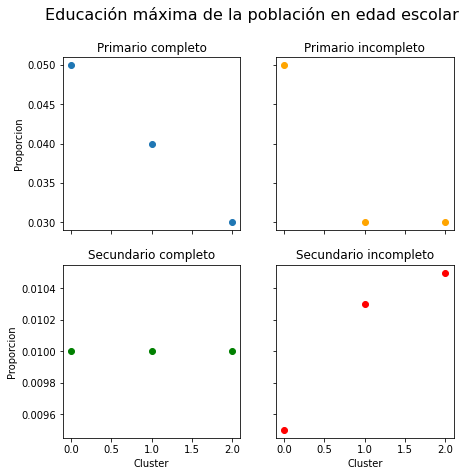

In [109]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(edad_escolar['ID'], edad_escolar['Cat1 %'])
axs[0, 0].set_title('Primario completo')
axs[0, 1].scatter(edad_escolar['ID'], edad_escolar['Cat2 %'], color='orange')
axs[0, 1].set_title('Primario incompleto')
axs[1, 0].scatter(edad_escolar['ID'], edad_escolar['Cat3 %'], color='green')
axs[1, 0].set_title('Secundario completo')
axs[1, 1].scatter(edad_escolar['ID'], edad_escolar['Cat4 %'], color='red')
axs[1, 1].set_title('Secundario incompleto')
fig.suptitle('Educación máxima de la población en edad escolar', fontsize=16)
fig.set_size_inches(7,7)

for ax in axs.flat:
    ax.set(xlabel='Cluster', ylabel='Proporcion')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

[Text(0, 0.5, 'Proporcion que no sabe leer'), Text(0.5, 0, 'Cluster')]

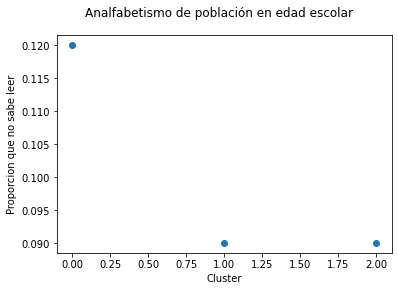

In [108]:
fig, ax = plt.subplots()
fig.suptitle('Analfabetismo de población en edad escolar')
ax.scatter(edad_escolar['ID'], edad_escolar['NoLee %'])
ax.set(xlabel='Cluster', ylabel='Proporcion que no sabe leer')

[Text(0, 0.5, 'Poblacion mayor a 65 años'), Text(0.5, 0, 'Cluster')]

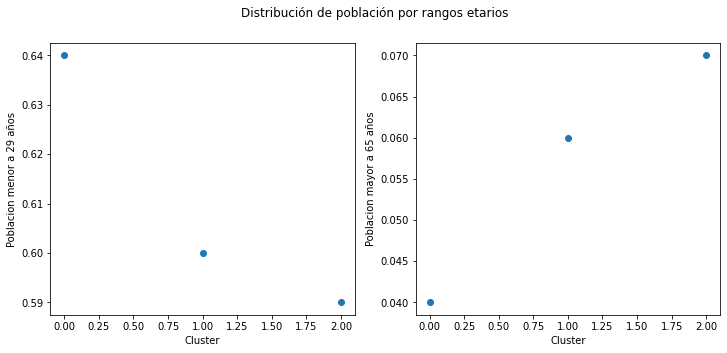

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,5)
fig.suptitle('Distribución de población por rangos etarios')
ax1.scatter(data['ID'], data['Pob_<29'])
ax2.scatter(data['ID'], data['Pob_>65'])
ax1.set(xlabel='Cluster', ylabel='Poblacion menor a 29 años')
ax2.set(xlabel='Cluster', ylabel='Poblacion mayor a 65 años')

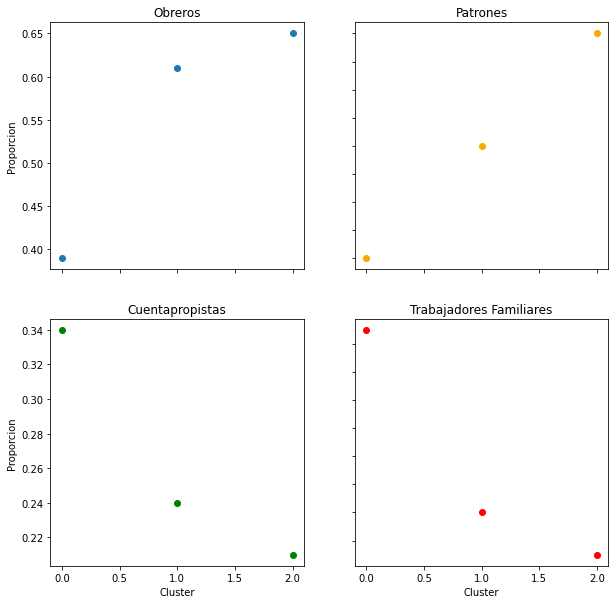

In [106]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(data['ID'], data['Cat-Obrero'])
axs[0, 0].set_title('Obreros')
axs[0, 1].scatter(data['ID'], data['Cat-Patron'], color='orange')
axs[0, 1].set_title('Patrones')
axs[1, 0].scatter(data['ID'], data['Cat-Cuentaprop'], color='green')
axs[1, 0].set_title('Cuentapropistas')
axs[1, 1].scatter(data['ID'], data['Cat-Familiar'], color='red')
axs[1, 1].set_title('Trabajadores Familiares')
fig.set_size_inches(10,10)

for ax in axs.flat:
    ax.set(xlabel='Cluster', ylabel='Proporcion')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

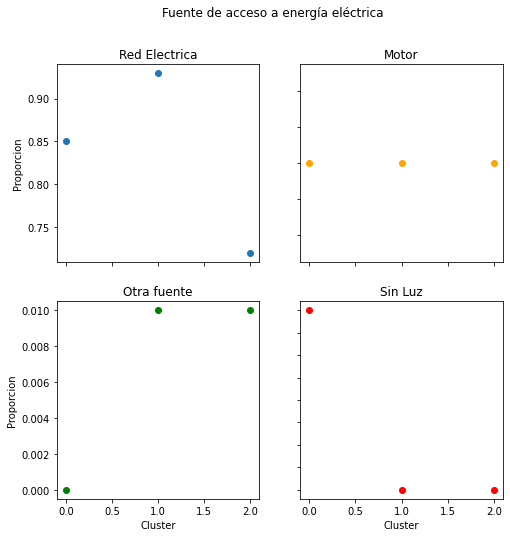

In [105]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(data['ID'], data['Luz-Red'])
axs[0, 0].set_title('Red Electrica')
axs[0, 1].scatter(data['ID'], data['Luz-Motor'], color='orange')
axs[0, 1].set_title('Motor')
axs[1, 0].scatter(data['ID'], data['Luz-Otro'], color='green')
axs[1, 0].set_title('Otra fuente')
axs[1, 1].scatter(data['ID'], data['Sin Luz'], color='red')
axs[1, 1].set_title('Sin Luz')

fig.suptitle('Fuente de acceso a energía eléctrica')
fig.set_size_inches(8,8)

for ax in axs.flat:
    ax.set(xlabel='Cluster', ylabel='Proporcion')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

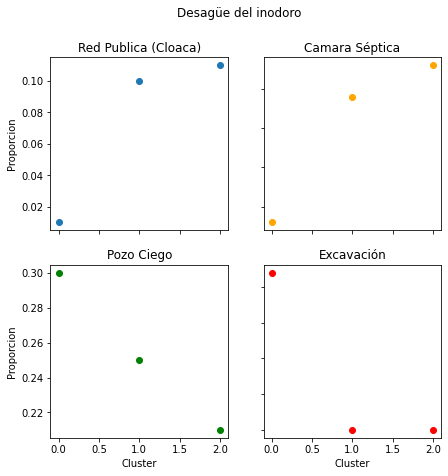

In [103]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(data['ID'], data['Desag1'])
axs[0, 0].set_title('Red Publica (Cloaca)')
axs[0, 1].scatter(data['ID'], data['Desag2'], color='orange')
axs[0, 1].set_title('Camara Séptica')
axs[1, 0].scatter(data['ID'], data['Desag3'], color='green')
axs[1, 0].set_title('Pozo Ciego')
axs[1, 1].scatter(data['ID'], data['Desag4'], color='red')
axs[1, 1].set_title('Excavación')

fig.suptitle('Desagüe del inodoro')
fig.set_size_inches(7,7)

for ax in axs.flat:
    ax.set(xlabel='Cluster', ylabel='Proporcion')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

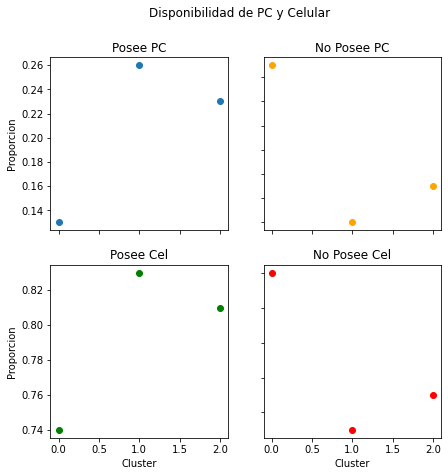

In [102]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(data['ID'], data['PC-SI'])
axs[0, 0].set_title('Posee PC')
axs[0, 1].scatter(data['ID'], data['PC-NO'], color='orange')
axs[0, 1].set_title('No Posee PC')
axs[1, 0].scatter(data['ID'], data['Cel-SI'], color='green')
axs[1, 0].set_title('Posee Cel')
axs[1, 1].scatter(data['ID'], data['Cel-NO'], color='red')
axs[1, 1].set_title('No Posee Cel')

fig.suptitle('Disponibilidad de PC y Celular')
fig.set_size_inches(7,7)

for ax in axs.flat:
    ax.set(xlabel='Cluster', ylabel='Proporcion')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0.5, 1.0, 'Población Rural')

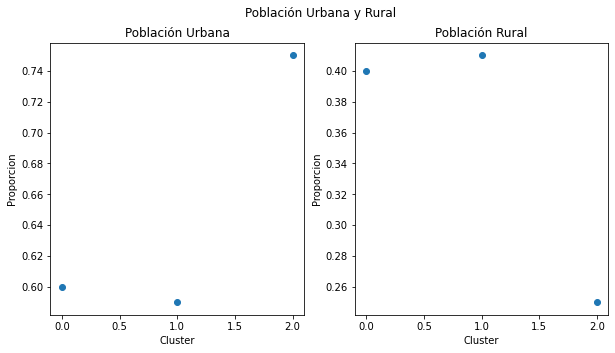

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Población Urbana y Rural')
fig.set_size_inches(10,5)
ax1.scatter(data['ID'], data['PobUrbana'])
ax1.set(xlabel='Cluster', ylabel='Proporcion')
ax1.set_title('Población Urbana')
ax2.scatter(data['ID'], data['PobRural'])
ax2.set(xlabel='Cluster', ylabel='Proporcion')
ax2.set_title('Población Rural')

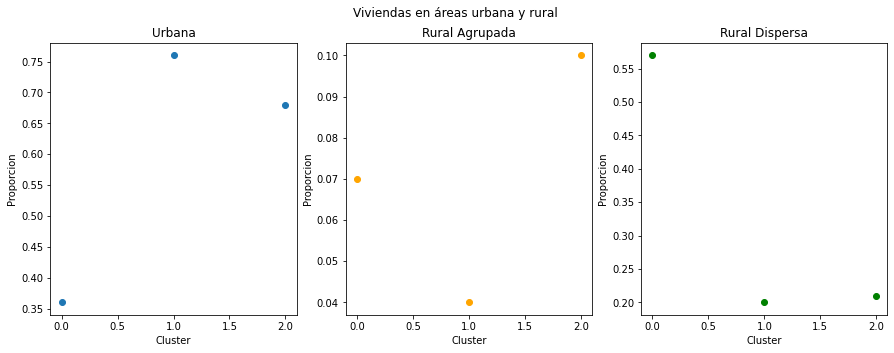

In [125]:
fig, axs = plt.subplots(1,3)
axs[0].scatter(data['ID'], data['Ar-Ur'])
axs[0].set_title('Urbana')
axs[1].scatter(data['ID'], data['Ar-Ru-Ag'], color='orange')
axs[1].set_title('Rural Agrupada')
axs[2].scatter(data['ID'], data['Ar-Ru-Di'], color='green')
axs[2].set_title('Rural Dispersa')

fig.suptitle('Viviendas en áreas urbana y rural')
fig.set_size_inches(15,5)

for ax in axs.flat:
    ax.set(xlabel='Cluster', ylabel='Proporcion')
